In [1]:
import os
import sys
import subprocess

os.environ["FLAGS_allocator_strategy"] = 'auto_growth'
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np
import json
import time
import logging
from PIL import Image
import tools.infer.utility as utility
import tools.infer.predict_rec as predict_rec
import tools.infer.predict_det as predict_det
import tools.infer.predict_cls as predict_cls
from tools.infer.predict_system import TextSystem
from ppocr.utils.utility import get_image_file_list, check_and_read_gif
from ppocr.utils.logging import get_logger
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image
import argparse
from paddleocr_config import get_config
logger = get_logger()


In [2]:
text_detector = './inference/en_PP-OCRv3_det_infer'
text_recognizer = './inference/PPOCRv3_rec_lisenceplate_28112022'
use_onnx = False
args = get_config(text_detector = text_detector, text_recognizer=text_recognizer, use_onnx=use_onnx)

In [3]:
count = 0
path_test = '/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/model_export_OPES'
df_res = {}
for img_name in os.listdir(path_test):
    count = count+1
    print(f'Image {count}: {img_name}')
    img_path = os.path.join(path_test,img_name)
    # fig, ax = plt.subplots(1,1)  
    # img_plot = Image.open(img_path)
    # plt.imshow(img_plot)

    args.image_dir = img_path
    image_file = args.image_dir
    text_sys = TextSystem(args)
    save_result = ""
    total_time = 0
    _st = time.time()

    img = cv2.imread(image_file)
    if img is None:
        logger.debug("error in loading image:{}".format(image_file))

    starttime = time.time()
    dt_boxes, rec_res = text_sys(img)
    elapse = time.time() - starttime
    total_time += elapse

    # for text, score in rec_res:
    #     logger.debug("{}, {:.3f}".format(text, score))
    #print(str(img_name) + "  Predict time of %s: %.3fs" % (image_file, elapse))
    for text, score in rec_res:
        save_result = save_result + text
    res = [{
         "transcription": rec_res[idx][0],
         "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
    } for idx in range(len(dt_boxes))]
    print(save_result)
    df_res[img_name] = save_result
    if len(res)>0:
        for box in res:
            x1, x2, x3, x4 = box['points']
            try:
                cv2.imwrite('/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/update_datatrain_16012023_OPES/'+str(img_name[:-4])+'_'+str(box['transcription'])+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
            except:
                print('Error for ', img_name)

Image 1: lisenceplate_1673862667.png
123.45
Image 2: lisenceplate_1673862801.png

Image 3: lisenceplate_1673863068.png
51H-141.06
Image 4: lisenceplate_1673863069.png
29A-163.50
Image 5: lisenceplate_1673863070.png
30H643.84
Image 6: lisenceplate_1673863072.png
51H356.71
Image 7: lisenceplate_1673863073.png
30E-081.74
Image 8: lisenceplate_1673863074.png
51A855.01
Image 9: lisenceplate_1673863075.png
30H269.86
Image 10: lisenceplate_1673863076.png
30F313.90
Image 11: lisenceplate_1673863077.png
51A135.31
Image 12: lisenceplate_1673863078.png
30H549.21
Image 13: lisenceplate_1673863079.png
51F-569.02
Image 14: lisenceplate_1673863082.png
51A-956.58
Image 15: lisenceplate_1673863083.png
30H643.84
Image 16: lisenceplate_1673863086.png
30E-081.74
Image 17: lisenceplate_1673863088.png
88A-123.45
Image 18: lisenceplate_1673863090.png
51G-497.27
Image 19: lisenceplate_1673863092.png
30H269.86
Image 20: lisenceplate_1673863093.png
63A133.63
Image 21: lisenceplate_1673863094.png
30F313.90
Image

In [16]:
import pandas as pd
df1 = pd.DataFrame.from_dict(df_res, orient='index')
df1.columns = ['1411']

In [17]:
df2 = pd.DataFrame.from_dict(df_res, orient='index')
df2.columns = ['2711']

In [18]:
df = pd.concat([df1, df2], axis=1)

,1411,2711
1668707445.png,XADAL,XADAL
1668701888.png,BAA210,BAA210
1668701918.png,ULT,ULT
1668707479.png,IUNDDNALTI3,IUNDDNALTI3
1668707493.png,BDILCZDA5,BDILCZDA5
1668707476.png,T3OLXL2L7,T3OLXL2L7
1668707461.png,HALUA2,HALUA2
1668701927.png,BDILCZDA5,BDILCZDA5
1668701895.png,HALUA2,HALUA2
1668707471.png,RTDNTM3,RTDNTM3


: 

In [5]:
args.image_dir = '/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/model_export_OPES/lisenceplate_1673862667.png'
image_file = args.image_dir
text_sys = TextSystem(args)


save_results = []
total_time = 0
cpu_mem, gpu_mem, gpu_util = 0, 0, 0
_st = time.time()
count = 0

img = cv2.imread(image_file)
if img is None:
    logger.debug("error in loading image:{}".format(image_file))

starttime = time.time()
dt_boxes, rec_res = text_sys(img)
elapse = time.time() - starttime
total_time += elapse

# for text, score in rec_res:
#     logger.debug("{}, {:.3f}".format(text, score))
print(str(image_file) + "  Predict time of %s: %.3fs" % (image_file, elapse))
res = [{
    "transcription": rec_res[idx][0],
    "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
} for idx in range(len(dt_boxes))]
img_name = args.image_dir.split('/')[-1]
for box in res:
    x1, x2, x3, x4 = box['points']
    cv2.imwrite('/home/os/Desktop/SETA/PaddleOCR-Studycases/train_data_lisenceplate_27112022/'+img_name+'_'+box['transcription']+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
res 


/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/model_export_OPES/lisenceplate_1673862667.png  Predict time of /home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/model_export_OPES/lisenceplate_1673862667.png: 0.022s


[{'transcription': 'XLN7R',
  'points': [[30, 94], [243, 80], [249, 164], [36, 179]]}]

In [8]:
x1, x2, x3, x4 = res[0]['points']

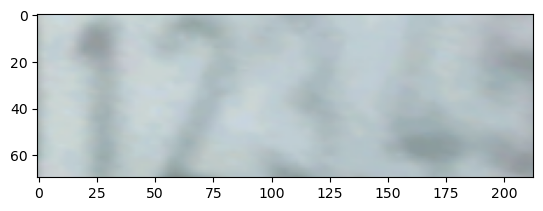

In [9]:
plt.imshow(img[x1[1]:x3[1], x1[0]:x2[0]])